In [2]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import animation

In [3]:
import ipympl
%matplotlib widget

Adams-Bashforth:

$$ f(t + \Delta t) = f(t) + \Delta t \left( \frac{3}{2}f_t(t) - \frac{1}{2}f_t(t - \Delta t)\right) $$

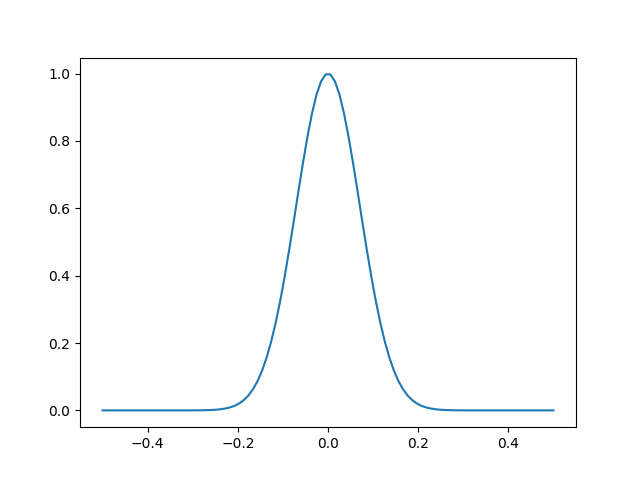

In [ ]:
x = np.linspace(-0.5, 0.5, 100)
t = np.linspace(0, 1, 5000)
dt = t[1] - t[0]
dx = x[1] - x[0]

f = np.exp(-(x / 0.1)**2)
f_t_prev = np.zeros_like(f)

fig, ax = plt.subplots()

line, = ax.plot(x, f)

# ax.set_ylim((0, 1))

def update(frame):
    global f, f_t_prev, line
    
    # Second order periodic upwind scheme
    f_x = np.zeros_like(f)

    if np.sin(2*np.pi*frame) < 0:
        f_x[:-2] = (3 * f[:-2] -4 * f[1:-1] + f[2:]) / (2 * dx)
        f_x[-2] = (3 * f[-2] - 4 * f[-1] + f[0]) / (2 * dx)
        f_x[-1] = (3 * f[-1] -4 * f[0] + f[1]) / (2 * dx)
        f_x = -f_x # Negative because dx is now negative
    else:
        f_x[2:] = (3 * f[2:] - 4 * f[1:-1] + f[:-2]) / (2 * dx)
        f_x[1] = (3 * f[1] - 4 * f[0] + f[-1]) / (2 * dx)
        f_x[0] = (3 * f[0] - 4 * f[-1] + f[-2]) / (2 * dx)

    f_t = - np.sin(2*np.pi*frame) * f_x

    if frame == 0:
        # Euler's method for first step
        f = f + f_t * dt
    else:
        # Adams-Bashforth 2nd order
        f = f + dt * (1.5 * f_t - 0.5 * f_t_prev)

    f_t_prev = f_t

    line.set_ydata(f)

    return line,

anim = animation.FuncAnimation(fig, update, frames=t, interval=1, blit=True, repeat=False)

plt.show()